In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

plt.style.use('seaborn-poster')

# Read data from CSV file
lungCancer_dataset = pd.read_csv('lungCancer.csv')
lungCancer_dataset.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


# CHECK & CLEANING DATASET

In [4]:
lungCancer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [5]:
lungCancer_dataset['GENDER'].value_counts()

M    162
F    147
Name: GENDER, dtype: int64

In [6]:
lungCancer_dataset['LUNG_CANCER'].value_counts()

YES    270
NO      39
Name: LUNG_CANCER, dtype: int64

In [7]:
lungCancer_dataset.groupby('LUNG_CANCER').mean()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
LUNG_CANCER,,,,,,,,,,,,,,
NO,60.743590,1.487179,1.333333,1.307692,1.256410,1.358974,1.487179,1.128205,1.230769,1.179487,1.256410,1.564103,1.128205,1.307692
YES,62.951852,1.574074,1.603704,1.525926,1.537037,1.525926,1.700000,1.618519,1.603704,1.611111,1.625926,1.651852,1.518519,1.592593


In [8]:
lungCancer_dataset.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [9]:
for col_name in [
  'GENDER',
  'AGE',
  'SMOKING',
  'YELLOW_FINGERS',
  'ANXIETY',
  'PEER_PRESSURE',
  'CHRONIC DISEASE',
  'FATIGUE',
  'ALLERGY',
  'WHEEZING',
  'ALCOHOL CONSUMING',
  'COUGHING',
  'SHORTNESS OF BREATH',
  'SWALLOWING DIFFICULTY',
  'CHEST PAIN'
] :
  print(lungCancer_dataset[col_name].value_counts())
  print('\n')

M    162
F    147
Name: GENDER, dtype: int64


64    20
63    19
56    19
62    18
60    17
61    16
59    15
70    15
67    13
58    13
69    11
55    11
72    10
71    10
68     9
57     9
77     9
51     8
54     8
65     7
74     6
75     5
76     4
52     4
53     4
73     4
47     4
66     4
49     3
81     2
78     2
44     2
48     2
21     1
79     1
38     1
39     1
87     1
46     1
Name: AGE, dtype: int64


2    174
1    135
Name: SMOKING, dtype: int64


2    176
1    133
Name: YELLOW_FINGERS, dtype: int64


1    155
2    154
Name: ANXIETY, dtype: int64


2    155
1    154
Name: PEER_PRESSURE, dtype: int64


2    156
1    153
Name: CHRONIC DISEASE, dtype: int64


2    208
1    101
Name: FATIGUE, dtype: int64


2    172
1    137
Name: ALLERGY, dtype: int64


2    172
1    137
Name: WHEEZING, dtype: int64


2    172
1    137
Name: ALCOHOL CONSUMING, dtype: int64


2    179
1    130
Name: COUGHING, dtype: int64


2    198
1    111
Name: SHORTNESS OF BREATH, dtype: int64


1  

## Replace Dictionary
'YES' (Lung Cancer) and 'M' (Male) = 1


'NO' (Not Lung Cancer) and 'F' (Female) = 0

In [10]:
# Replace dictionary
dict = {'YES':1,
        'NO':0,
        'M':1,
        'F':0,
        2:1,
        1:0}

lungCancer_dataset_replaced = lungCancer_dataset.replace(dict)
lungCancer_dataset_replaced.head()

lungCancer_dataset_cleaned1 = lungCancer_dataset_replaced.drop(columns='AGE', axis=1)
lungCancer_dataset_cleaned2 = lungCancer_dataset_cleaned1.drop(columns='GENDER', axis=1)
lungCancer_dataset_cleaned2.head()

,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [11]:
lungCancer_dataset_cleaned2.groupby('LUNG_CANCER').mean()

,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
LUNG_CANCER,,,,,,,,,,,,,
0,0.487179,0.333333,0.307692,0.256410,0.358974,0.487179,0.128205,0.230769,0.179487,0.256410,0.564103,0.128205,0.307692
1,0.574074,0.603704,0.525926,0.537037,0.525926,0.700000,0.618519,0.603704,0.611111,0.625926,0.651852,0.518519,0.592593


Pemisahan data

In [12]:
X = lungCancer_dataset_cleaned2.iloc[:,0:13]
y = lungCancer_dataset_cleaned2.iloc[:,13]

X

,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,0,1,1,0,0,1,0,1,1,1,1,1,1
1,1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,0,0,1,0,1,0,1,0,1,1,0,1
3,1,1,1,0,0,0,0,0,1,0,0,1,1
4,0,1,0,0,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,0,0,1,1,1,0,0,1,1,1,1,0
305,1,0,0,0,0,1,1,1,1,1,1,0,1
306,1,0,0,0,0,0,1,1,1,1,0,0,1
307,1,0,1,0,0,1,1,0,1,1,1,0,1


In [13]:
y

0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: int64

# TRAINING & TESTING DATASET

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train

,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
126,1,0,0,0,0,1,0,1,1,1,1,0,1
109,0,0,0,0,1,1,1,0,1,0,1,0,1
247,0,1,0,0,0,1,0,1,1,1,1,0,0
234,0,1,0,1,0,1,1,1,1,1,0,0,0
202,1,0,0,0,1,1,1,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,1,1,1,1,1,0,0,0,0,0,0,0,0
71,1,1,1,1,0,1,0,1,0,1,1,1,0
106,1,1,1,1,1,1,0,0,0,0,1,1,0
270,1,0,0,0,0,1,0,0,0,0,1,0,0


In [15]:
y_train

126    1
109    1
247    1
234    1
202    1
      ..
188    1
71     1
106    1
270    0
102    1
Name: LUNG_CANCER, Length: 247, dtype: int64

In [16]:
X_test

,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
288,0,1,1,1,0,0,1,1,0,1,0,1,0
9,1,1,1,1,1,0,1,0,1,0,0,1,1
57,0,0,0,0,1,0,1,0,1,1,1,1,1
60,0,1,0,1,1,1,1,1,1,1,0,1,1
25,0,1,1,0,0,1,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,1,1,1,0,1,0,1,0,1,0,0,0,0
195,0,1,1,0,0,0,0,1,1,1,1,1,0
210,1,0,0,0,0,0,1,1,1,1,0,0,0
224,1,0,0,1,0,1,1,1,1,1,0,1,1


In [17]:
y_test

288    1
9      1
57     1
60     1
25     1
      ..
198    1
195    1
210    1
224    1
158    1
Name: LUNG_CANCER, Length: 62, dtype: int64

# CLASSIFICATION

In [18]:
# Featuring Scaling
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

classification = SVC(kernel='linear', random_state=0)
classification = classification.fit(X_train, y_train)

# Prediction
y_pred = classification.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

<AxesSubplot:>

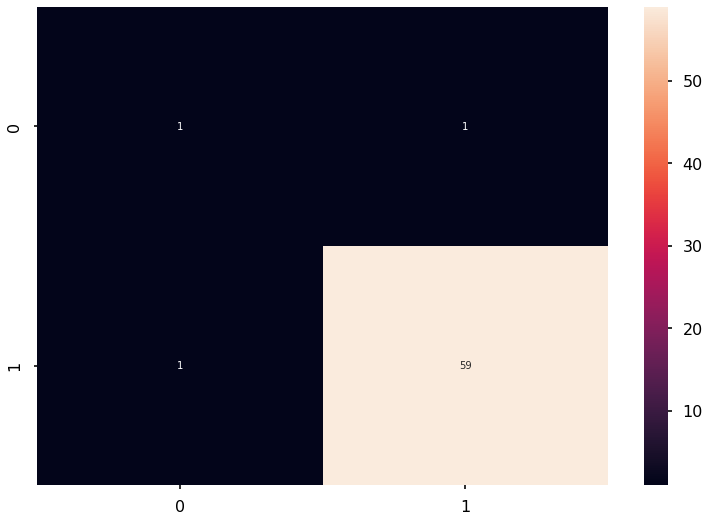

In [20]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [21]:
print(accuracy_score(y_pred, y_test)*100, '%')
print(classification_report(y_test, y_pred))

96.7741935483871 %
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



# INPUT SYSTEM

In [34]:
input_data = (1,1,0,0,0,0,0,0,0,1,0,1,0)
#input_data = (0,0,0,0,0,0,0,0,0,0,0,0,0)
#input_data = (1,1,1,1,1,1,1,1,1,1,1,1,1)

# Convert into numpy array
input_data_as_array = np.asarray(input_data)
input_data_reshape = input_data_as_array.reshape(1,-1)

# Standardize the input data
input_data_std = sc_X.transform(input_data_reshape)

input_predict = classification.predict(input_data_std)
print(input_data_std)
print(input_predict)

if (input_predict[0] == 1):
  print('This person possibly positive Lung Cancer\n')
else:
  print('This person possibly negative Lung Cancer\n')


[[ 0.87423436  0.91830473 -0.95641449 -0.98792712 -0.96420304 -1.55902391
  -1.07136646 -1.08896313 -1.08896313  0.84574096 -1.39300976  1.15333806
  -1.08896313]]
[1]
This person possibly positive Lung Cancer



c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
